# 第八章 神经网络

## 8.1

## 8.2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
line = np.linspace(-5, 5, 200)
plt.plot(line,np.tanh(line),label='tanh')
plt.plot(line,np.maximum(line,0),label='relu')
plt.legend(loc = 'best')
plt.xlabel('x')
plt.ylabel('relu(X) and tanh(x)')
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
wine = load_wine()
X = wine.data[:, :2]
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
mlp = MLPClassifier(solver = 'lbfgs')
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

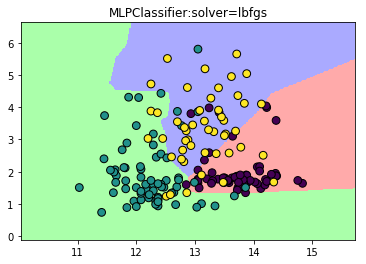

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=60)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("MLPClassifier:solver=lbfgs")

plt.show()

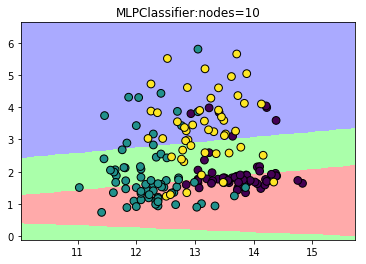

In [4]:
mlp_20=MLPClassifier(solver='lbfgs', hidden_layer_sizes=[10])
mlp_20.fit(X_train, y_train)
Z1 = mlp_20.predict(np.c_[xx.ravel(), yy.ravel()])

Z1 = Z1.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z1, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=60)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("MLPClassifier:nodes=10")

plt.show()

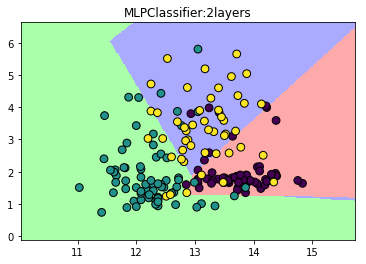

In [5]:
mlp_2L=MLPClassifier(solver='lbfgs', hidden_layer_sizes=[10,10])
mlp_2L.fit(X_train, y_train)
Z1 = mlp_2L.predict(np.c_[xx.ravel(), yy.ravel()])

Z1 = Z1.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z1, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=60)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("MLPClassifier:2layers")

plt.show()

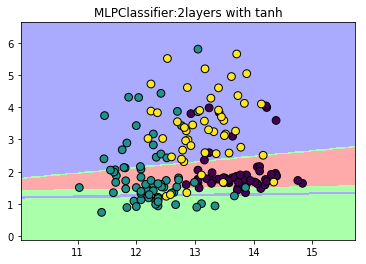

In [6]:
mlp_tanh=MLPClassifier(solver='lbfgs', hidden_layer_sizes=[10,10],
                    activation='tanh')
mlp_tanh.fit(X_train, y_train)
Z2 = mlp_tanh.predict(np.c_[xx.ravel(), yy.ravel()])

Z2 = Z2.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z2, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=60)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("MLPClassifier:2layers with tanh")

plt.show()

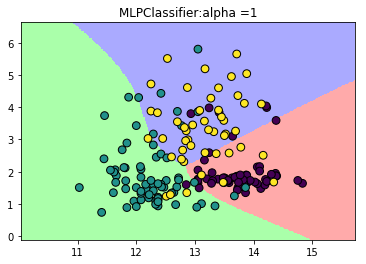

In [7]:
mlp_alpha=MLPClassifier(solver='lbfgs', hidden_layer_sizes=[10,10],
                    activation='tanh',alpha=1)
mlp_alpha.fit(X_train, y_train)
Z3 = mlp_alpha.predict(np.c_[xx.ravel(), yy.ravel()])

Z3 = Z3.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z3, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=60)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("MLPClassifier:alpha =1")

plt.show()

## 8.3 手写识别

In [8]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

E:\Anaconda\Anaconda3\envs\env_1\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
E:\Anaconda\Anaconda3\envs\env_1\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [9]:
print('样本数量：{}, 样本特征数：{}'.format(mnist.data.shape[0],
                                 mnist.data.shape[1]))

样本数量：70000, 样本特征数：784


In [17]:
X = mnist.data/255
y = mnist.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size = 5000, test_size=1000,random_state=62)

In [ ]:
mlp_hw = MLPClassifier(solver='lbfgs',hidden_layer_sizes=[100,100],
                       activation='relu', alpha = 1e-5,random_state=62)
mlp_hw.fit(X_train,y_train)
print('测试数据集得分：{:.2f}%'.format(mlp_hw.score(X_test,y_test)*100))
print('\n\n\n代码运行结果：')
print('==============')
print('测试数据集得分：{:.2f}%'.format(mlp_hw.score(X_test, y_test)*100))
print('==============')
print('\n\n\n')

In [16]:
from PIL import Image
image=Image.open('4.png').convert('F')
image=image.resize((28,28))

IOError: [Errno 2] No such file or directory: '4.png'